In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
sns.set_context("paper")
sns.set_style("darkgrid")

## Classification Results

In [31]:
base_detr_results = {
    0.5 : (0.3881798103988981, 1.566702961921692, 0.35076209902763367),
    0.6 : (0.4122868109036061, 1.7059528827667236, 0.32257983088493347),
    0.7 : (0.446131833046385, 1.9137988090515137, 0.28458917140960693),
    0.8 : (0.4885957000581372, 2.2247438430786133, 0.23642176389694214),
    0.9 : (0.5293224685872711, 2.720128297805786, 0.1866215616464615)
}

base_detr_results_df = pd.DataFrame.from_dict(base_detr_results, columns=['ece', 'nll', 'accuracy'], orient='index')
base_detr_results_df.reset_index(inplace=True)
base_detr_results_df = base_detr_results_df.rename(columns = {'index':'iou'})

detr_decoder_ensemble_results = {
0.5 : (0.3337526349628904, 1.5079797506332397, 0.3964744210243225),
0.6 : (0.364064681915301, 1.664647102355957, 0.36151355504989624),
0.7 : (0.4049172893333403, 1.8912467956542969, 0.3157116174697876),
0.8 : (0.4558427220440042, 2.2183403968811035, 0.2598857581615448),
0.9 : (0.5027828537980524, 2.747073173522949, 0.20238986611366272),
}

detr_decoder_ensemble_results_df = pd.DataFrame.from_dict(detr_decoder_ensemble_results, columns=['ece', 'nll', 'accuracy'], orient='index')
detr_decoder_ensemble_results_df.reset_index(inplace=True)
detr_decoder_ensemble_results_df = detr_decoder_ensemble_results_df.rename(columns={'index':'iou'})

detr_full_ensemble_results = {
    0.5 : (0.32159717725877285, 1.4663114547729492, 0.4175465703010559),
    0.6 : (0.35051035374036743, 1.6121017932891846, 0.38443654775619507),
    0.7 : (0.39099102648878103, 1.8285490274429321, 0.33868512511253357),
    0.8 : (0.445047662059405, 2.156130075454712, 0.2792353630065918),
    0.9 : (0.5027604752952337, 2.68404483795166, 0.21029244363307953)
}

detr_full_ensemble_results_df = pd.DataFrame.from_dict(detr_full_ensemble_results, columns=['ece', 'nll', 'accuracy'], orient='index')
detr_full_ensemble_results_df.reset_index(inplace=True)
detr_full_ensemble_results_df = detr_full_ensemble_results_df.rename(columns={'index':'iou'})

In [32]:
base_detr_results_df

,iou,ece,nll,accuracy
0,0.5,0.388180,1.566703,0.350762
1,0.6,0.412287,1.705953,0.322580
2,0.7,0.446132,1.913799,0.284589
3,0.8,0.488596,2.224744,0.236422
4,0.9,0.529322,2.720128,0.186622


In [33]:
detr_decoder_ensemble_results_df

,iou,ece,nll,accuracy
0,0.5,0.333753,1.507980,0.396474
1,0.6,0.364065,1.664647,0.361514
2,0.7,0.404917,1.891247,0.315712
3,0.8,0.455843,2.218340,0.259886
4,0.9,0.502783,2.747073,0.202390


In [34]:
detr_full_ensemble_results_df

,iou,ece,nll,accuracy
0,0.5,0.321597,1.466311,0.417547
1,0.6,0.350510,1.612102,0.384437
2,0.7,0.390991,1.828549,0.338685
3,0.8,0.445048,2.156130,0.279235
4,0.9,0.502760,2.684045,0.210292


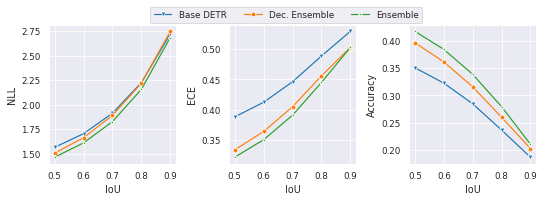

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(7.5, 2.5))
fig.tight_layout(w_pad=2.2)

sns.lineplot(x='iou', y='nll', data=base_detr_results_df, ax=axes[0], marker='v', label='Base DETR')
sns.lineplot(x='iou', y='nll', data=detr_decoder_ensemble_results_df, ax=axes[0], marker='o', label='Dec. Ensemble')
sns.lineplot(x='iou', y='nll', data=detr_full_ensemble_results_df, ax=axes[0], marker='*', label='Ensemble')
axes[0].set_ylabel('NLL')
axes[0].set_xlabel('IoU')
axes[0].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[0].get_legend().remove()
sns.lineplot(x='iou', y='ece', data=base_detr_results_df, ax=axes[1], marker='v', label='Base DETR')
sns.lineplot(x='iou', y='ece', data=detr_decoder_ensemble_results_df, ax=axes[1], marker='o', label='Dec. Ensemble')
sns.lineplot(x='iou', y='ece', data=detr_full_ensemble_results_df, ax=axes[1], marker='*', label='Ensemble')
axes[1].set_ylabel('ECE')
axes[1].set_xlabel('IoU')
axes[1].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[1].get_legend().remove()
sns.lineplot(x='iou', y='accuracy', data=base_detr_results_df, ax=axes[2], marker='v', label='Base DETR')
sns.lineplot(x='iou', y='accuracy', data=detr_decoder_ensemble_results_df, ax=axes[2], marker='o', label='Dec. Ensemble')
sns.lineplot(x='iou', y='accuracy', data=detr_full_ensemble_results_df, ax=axes[2], marker='*', label='Ensemble')

axes[2].set_ylabel('Accuracy')
axes[2].set_xlabel('IoU')
axes[2].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[2].get_legend().remove()
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.05))

plt.savefig('classification_results.pdf', format='pdf', bbox_inches='tight')

## Coverage & Precision Results

In [17]:
base_detr_results = {
0.5 : (0.27898370087404856, 0.3107749981931961, 0.30671457060320395),
0.6 : (0.2545188232752138, 0.2785261042083046, 0.27684842607838517),
0.7 : (0.2173413994865696, 0.23356270997008374, 0.23280175033871198),
0.8 : (0.16241360023415613, 0.1710616869812514, 0.17065853350170218),
0.9 : (0.08536157270546453, 0.08797507262523059, 0.08775079314053548),
}

base_detr_results_df = pd.DataFrame.from_dict(base_detr_results, columns=['mean_iou', 'coverage', 'precision'], orient='index')
base_detr_results_df.reset_index(inplace=True)
base_detr_results_df = base_detr_results_df.rename(columns = {'index':'iou'})

detr_decoder_ensemble_results = {
0.5 : (0.31138518223402445, 0.3461010847065626, 0.345465240369838), 
0.6 : (0.28125806922978963, 0.3073006375792217, 0.308083815612627), 
0.7 : (0.23713784899619142, 0.25443064567947843, 0.25549602946009464), 
0.8 : (0.17355949452229621, 0.18256520841294457, 0.18313123285487964), 
0.9 : (0.08726219895490583, 0.08981045860261914, 0.08994831456431358), 
}

detr_decoder_ensemble_results_df = pd.DataFrame.from_dict(detr_decoder_ensemble_results, columns=['mean_iou', 'coverage', 'precision'], orient='index')
detr_decoder_ensemble_results_df.reset_index(inplace=True)
detr_decoder_ensemble_results_df = detr_decoder_ensemble_results_df.rename(columns={'index':'iou'})

detr_full_ensemble_results = {
    0.5 : (0.332786279341308, 0.3692995355060119, 0.36558158761119053),
    0.6 : (0.30428190360556745, 0.3323352542278105, 0.3307790261997101),
    0.7 : (0.2604124638534546, 0.27935132611957725, 0.2791889792188043),
    0.8 : (0.19473878703094188, 0.20492785574629444, 0.204980611369956),
    0.9 : (0.10016339159300792, 0.10310038787552123, 0.10315194630745286),
}

detr_full_ensemble_results_df = pd.DataFrame.from_dict(detr_full_ensemble_results, columns=['mean_iou', 'coverage', 'precision'], orient='index')
detr_full_ensemble_results_df.reset_index(inplace=True)
detr_full_ensemble_results_df = detr_full_ensemble_results_df.rename(columns={'index':'iou'})

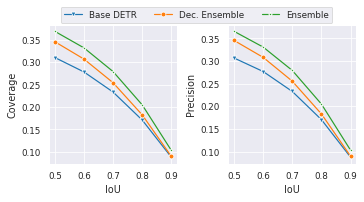

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(5, 2.5))
fig.tight_layout(w_pad=2)
sns.lineplot(x='iou', y='coverage', data=base_detr_results_df, ax=axes[0], marker='v', label='Base DETR')
sns.lineplot(x='iou', y='coverage', data=detr_decoder_ensemble_results_df, ax=axes[0], marker='o', label='Dec. Ensemble')
sns.lineplot(x='iou', y='coverage', data=detr_full_ensemble_results_df, ax=axes[0], marker='*', label='Ensemble')
axes[0].set_ylabel('Coverage')
axes[0].set_xlabel('IoU')
axes[0].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[0].get_legend().remove()
sns.lineplot(x='iou', y='precision', data=base_detr_results_df, ax=axes[1], marker='v', label='Base DETR')
sns.lineplot(x='iou', y='precision', data=detr_decoder_ensemble_results_df, ax=axes[1], marker='o', label='Dec. Ensemble')
sns.lineplot(x='iou', y='precision', data=detr_full_ensemble_results_df, ax=axes[1], marker='*', label='Ensemble')
axes[1].set_ylabel('Precision')
axes[1].set_xlabel('IoU')
axes[1].set_xticks(ticks=np.arange(0.5, 0.99, 0.1))
axes[1].get_legend().remove()
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.05))

plt.savefig('coverage_precision_results.pdf', format='pdf', bbox_inches='tight')